# Diabetes Prediction (Tensorflow)

In [1]:
%attachments

UsageError: Line magic function `%attachments` not found.


In [2]:
%%trainingcpu
print("Hello world")

History URL: http://trainingcpu-restserver-wqdhd-0.trainingcpuhtnb2.mlops.svc.cluster.local:10001/history/2


In [57]:
%logs --url http://trainingcpu-restserver-wqdhd-0.trainingcpuhtnb2.mlops.svc.cluster.local:10001/history/2

Job Status: Finished
Hello world





# Visualization

In [1]:
import numpy
import os
import pandas as pd
import tensorflow as tf

## Set the project repo 
def ProjectRepo(path):
   ProjectRepo = "/bd-fs-mnt/project_repo"
   return str(ProjectRepo + '/' + path)

## Load the dataset
dataset = pd.read_csv(ProjectRepo('data/pima-indians-diabetes.csv'), delimiter=",")
dataset.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

- Pregnancies
- Glucose — The blood plasma glucose concentration after a 2 hour oral glucose tolerance test.
- BloodPressure — Diastolic blood pressure (mm/HG).
- SkinThickness — Skinfold thickness of the triceps (mm).
- Insulin — 2 hour serum insulin (mu U/ml).
- BMI — Body mass index (kg/m squared)
- DiabetesPedigreeFunction — A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
- Age.
- Outcome — Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).

In [14]:
corr = dataset.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
PlGlcConc,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
BloodP,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
SkinThick,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
TwoHourSerIns,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
BMI,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
DiPedFunc,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Age,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
HasDiabetes,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


<AxesSubplot:>

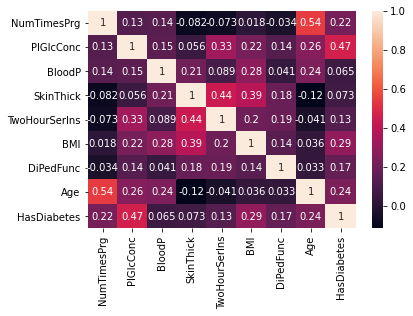

In [15]:
%matplotlib inline
import seaborn as sns
sns.heatmap(corr, annot = True)

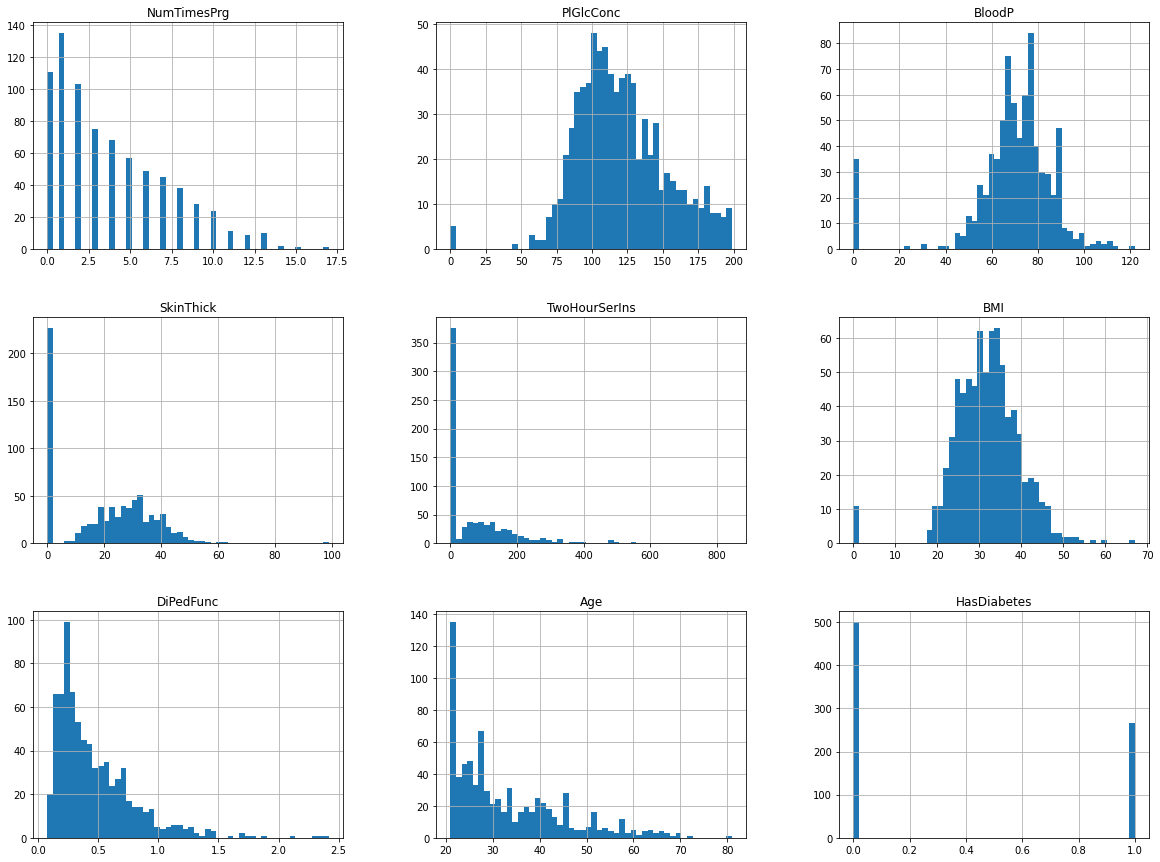

In [6]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

# Model Training

In [3]:
#%%trainingcpu

import numpy
import os
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

## Set the project repo 
def ProjectRepo(path):
   ProjectRepo = "/bd-fs-mnt/project_repo"
   return str(ProjectRepo + '/' + path)  

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

## Load the dataset
print("Loading data")
dataset = loadtxt(ProjectRepo('data/pima-indians-diabetes.csv'), delimiter=",") 
dataset.shape

# Split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

# Define the keras model
print("Building model")
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the keras model on the dataset
print("Training model")
model.fit(X, y, epochs=150, batch_size=10, verbose= 0)

# Evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# Make class predictions with the model
predictions = model.predict_classes(X)

# Summarize the first 3 cases
for i in range(3):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

# Save model weights and architecture together
print("Saving model")
model.save(ProjectRepo('models/diabetes/db_remote.h5'))

# Evaluate the keras model
_, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# Make class predictions with the model
predictions = model.predict_classes(X)

# Summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))
    
# Prepare TF Serving
print("Preparing for TF Serving")
MODEL_VERSION = 1
tf.keras.backend.set_learning_phase(0) 
model = tf.keras.models.load_model(ProjectRepo('models/diabetes/db_remote.h5'))
export_path = ProjectRepo('models/diabetes/' + str(MODEL_VERSION))
tf.keras.models.save_model(model, export_path)
    
# Summarize model.
model.summary()
print("Done")

Loading data
Building model
Training model
Accuracy: 79.30
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
Saving model
Accuracy: 79.30
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
Preparing for TF Serving
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied 

In [17]:
%logs --url http://trainingcpu-loadbalancer-zh6ns-0.trainingcpuhtnb2.mlops.svc.cluster.local:10001/history/10

UsageError: Line magic function `%logs` not found.


## Inference 
- Replace "A" with your serving endpoint found in the "Model Serving Lodbalancer" service
- Replace "B" with your model name
- Replace "C" with your model version
- Replace "D" with your auth token found in the "Model Serving LoadBalancer" 

In [10]:
%%bash

curl --location -k -s --request POST 'http://10.192.1.24/deabetes/1/predict' \
--header "X-Auth-Token: 6290dd69d9fbb1a6d998a6676f80719d" \
--header 'Content-Type: application/json' \
-d ' {
    "use_scoring" : true,
    "scoring_args" : {
        "NumPreg":1.0, 
        "Glucose": 85.0, 
        "BloodPressure": 66.0,
        "SkinThick": 29.0, 
        "Insulin": 0.0, 
        "BMI": 26.6,
        "DiabetesPedFunc": 0.351,
        "Age": 35.0
    }
}' | python -m json.tool | grep output | cut -d'\' -f 1


Expecting value: line 1 column 1 (char 0)


In [20]:
%%bash
curl --request POST 'http://10.192.1.27:32700/diabetes/1/predict' \
--header 'X-Auth-Token: 1330cceb993eae52628a3b147b73ae39' \
--header 'Content-Type: application/json' \
--data '{ 
	"use_scoring": true, 
	"scoring_args": {
		"NumPreg" : 8.0, 
		"Glucose" : 183.0, 
		"BloodPressure" : 64.0, 
		"SkinThick" : 0.0, 
		"Insulin" : 0.0, 
		"BMI" : 23.3, 
		"DiabetesPedFunc" : 0.672, 
		"Age" : 32.0
	}
}'

{"input":"{''NumPreg'': 8.0, ''Glucose'': 183.0, ''BloodPressure'': 64.0, ''SkinThick'': 0.0, ''Insulin'': 0.0, ''BMI'': 23.3, ''DiabetesPedFunc'': 0.672, ''Age'': 32.0}","log_url":"http://kdss-9c4t9-0.kdhs-dp4vc.sales.svc.cluster.local:10001/logs/3","node":"kdss-9c4t9-0.kdhs-dp4vc.sales.svc.cluster.local","output":"2021-09-28 04:01:10.750584: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory\n2021-09-28 04:01:10.750615: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: UNKNOWN ERROR (303)\n2021-09-28 04:01:10.750646: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kdss-9c4t9-0): /proc/driver/nvidia/version does not exist\n2021-09-28 04:01:10.750825: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlo

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2687  100  2465  100   222    861     77  0:00:02  0:00:02 --:--:--   939
